#### Dataset:Google Stock

In [48]:
import pandas as pd
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
series = pd.read_csv(
'C:/Users/Admin/Desktop/google-stock-dataset-Daily.csv',header=0,
    index_col=0, parse_dates=True)
print(type(series))
print(series.head())

<class 'pandas.core.frame.DataFrame'>
            Price
Date             
2013-04-15  19.67
2013-04-16  19.68
2013-04-17  19.69
2013-04-18  19.65
2013-04-19  19.25


In [49]:
series.head()

,Price
Date,
2013-04-15,19.67
2013-04-16,19.68
2013-04-17,19.69
2013-04-18,19.65
2013-04-19,19.25


In [50]:
series.tail()

,Price
Date,
2023-03-27,104.62
2023-03-28,102.44
2023-03-29,102.28
2023-03-30,100.91
2023-03-31,101.30


In [51]:
series.size

2510

In [52]:
series.describe()

,Price
count,2510.000000
mean,61.520645
std,34.467579
min,19.250000
25%,34.412500
50%,53.245000
75%,78.442500
max,151.250000


In [53]:
series.isnull().sum()

Price    0
dtype: int64

#### 1. Plot time series format

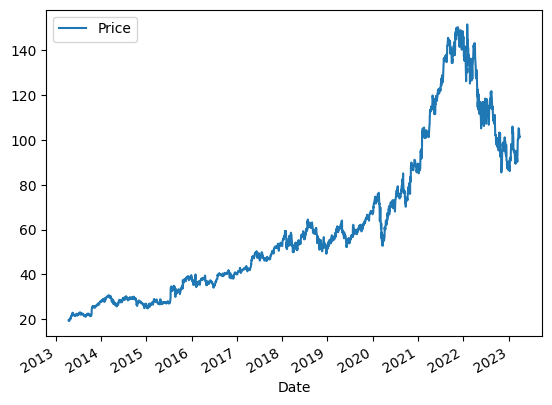

In [54]:
series.plot()
pyplot.show()

#### 2. Extract components of time series analysis

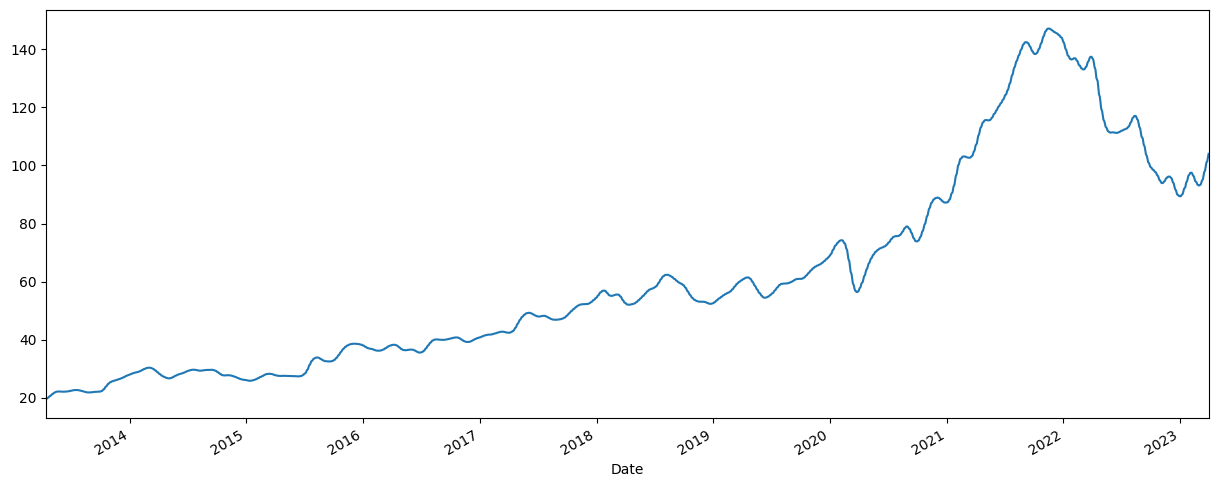

In [55]:
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df_cycle,df_trend=hpfilter(series['Price'], lamb=1600)
df_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

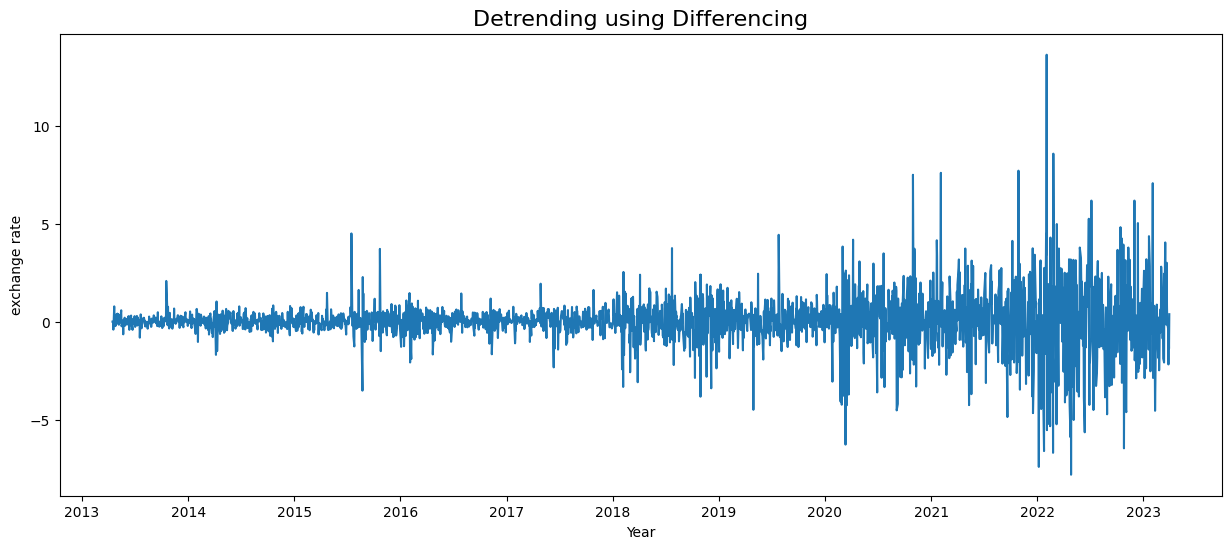

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
diff = series.Price.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('exchange rate')
plt.show()

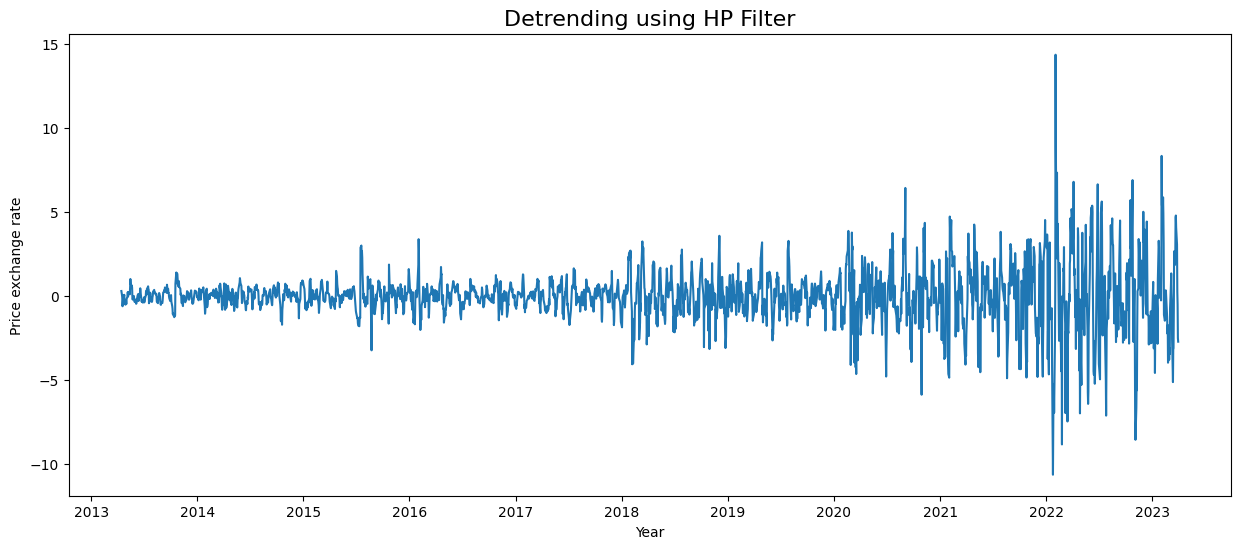

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
price_cycle,price_trend = hpfilter(series['Price'], lamb=1600)
series['trend'] = price_trend
detrended = series.Price - series['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Price exchange rate')
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

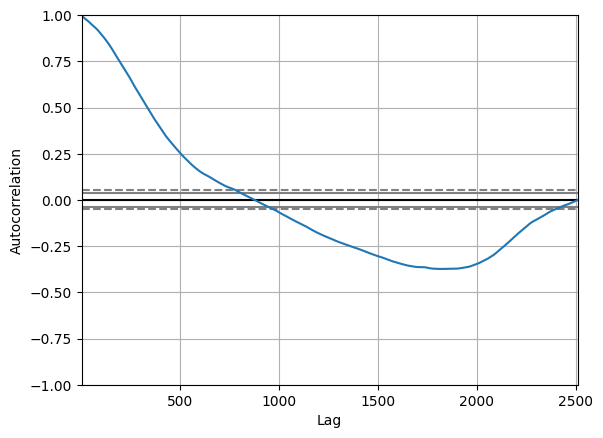

In [58]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
autocorrelation_plot(series.Price.tolist())

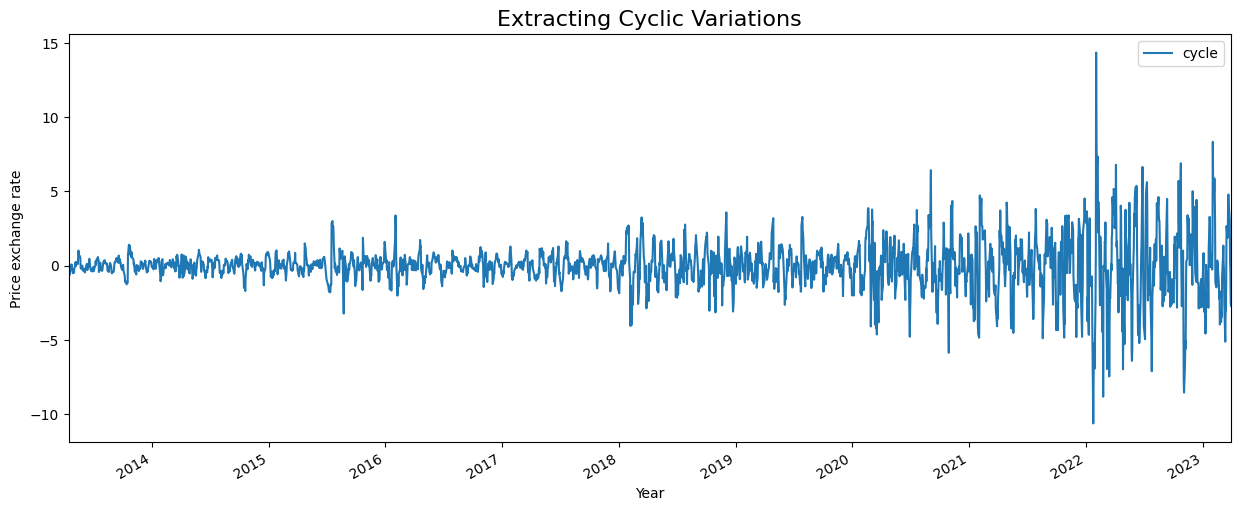

In [59]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
price_cycle,price_trend = hpfilter(series['Price'], lamb=1600)
series['cycle'] =price_cycle
series['trend'] =price_trend
series[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Price exchange rate')
plt.show()

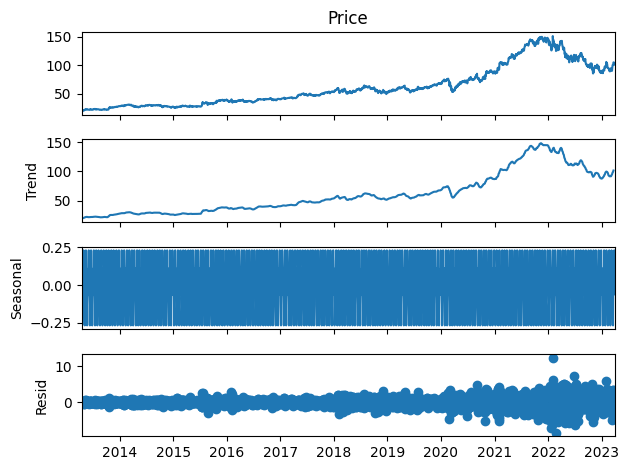

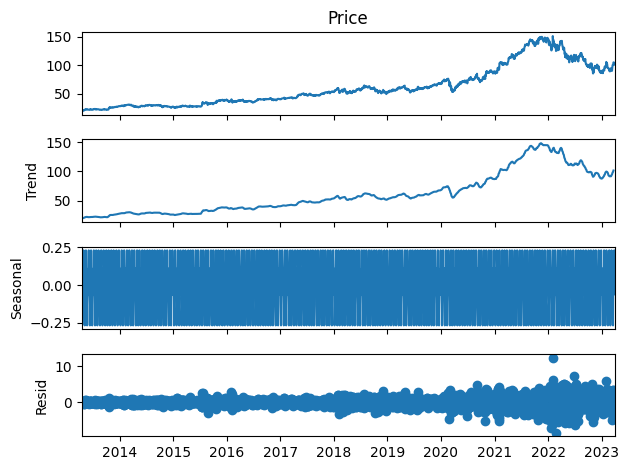

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
result=seasonal_decompose(x=series['Price'],model='add',period=12)
result.plot()

#### 3. Check Wether the data is stationary/ non-stationary

In [61]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = series['Price'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.718000
p-value: 0.842032
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [62]:
#Performing ADF test.

result = adfuller(series['Price'], autolag='AIC')

#Checking the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Stationary")

ADF Statistic: -0.718000
p-value: 0.842032
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary


Data is stationary.

#### 5. Implement any one model for time series

#### Auto regression

Lag: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Coefficients: [ 7.64799603e-02  9.50698956e-01  5.92602423e-02 -5.83428521e-02
  4.37923603e-04  4.10874039e-02 -2.86401475e-02  2.92548184e-02
 -1.91486324e-02  4.17359551e-02  1.57773075e-02 -1.81780837e-02
 -6.14969485e-02  6.47722104e-02  2.49211124e-03 -6.05467003e-02
  4.89960182e-02  2.21650346e-02 -5.83499597e-02  1.81354826e-02
 -1.54858971e-02  5.55796943e-03  5.10421807e-03 -7.75338476e-02
  1.16865405e-01 -1.62476830e-02 -4.27947447e-02  4.67185208e-02
 -3.87960999e-02  1.70204506e-02  8.95925138e-03]
predicted=104.226637, expected=105.060000
predicted=104.238915, expected=104.990000
predicted=103.868423, expected=104.620000
predicted=103.865055, expected=102.440000
predicted=104.155011, expected=102.280000
predicted=103.941344, expected=100.910000
predicted=104.096333, expected=101.300000
Test RMSE: 1.866


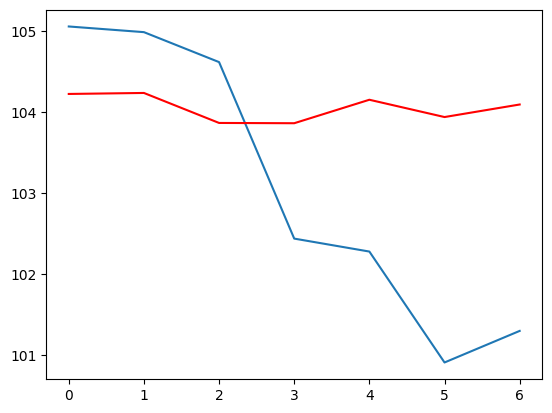

In [36]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# split dataset
X = series["Price"].values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train,30)
model_fit = model.fit()
print('Lag: %s' % model_fit.ar_lags)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### ARIMA Model

In [37]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit=auto_arima(series['Price'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8493.915, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8499.340, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8494.876, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8495.015, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8498.875, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8493.639, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8496.731, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8496.138, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8490.091, Time=0.80 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8493.771, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8491.759, Time=0.88 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=8491.646, Time=0.63 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=8490.208, Time=0.19 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=8490.990, Time=0.89 sec
 ARIMA(1,1,3)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2510
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -4239.045
Date:                Tue, 23 Apr 2024   AIC                           8490.091
Time:                        18:43:51   BIC                           8525.057
Sample:                             0   HQIC                          8502.783
                               - 2510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0121      0.010      1.276      0.202      -0.007       0.031
ar.L1          0.6276      0.112      5.608      0.000       0.408       0.847
ma.L1         -0.6810      0.112     -6.058      0.000      -0.901      -0.461
ma.L2          0.0458      0.015      3.048      0.002       0.016       0.075
ma.L3         -0.0568      0.014     -4.195      0.000      -0.083      -0.030
sigma2         1.7180      0.020     86.256      0.000       1.679       1.757
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12998.59
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              18.52   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Split your dataset

In [38]:
print(series.shape)

(2510, 3)


In [39]:
train=series.iloc[:-30]
test=series.iloc[-30:]
print(train.shape,test.shape)

(2480, 3) (30, 3)


In [41]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Price'],order=(1,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2480
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -4179.551
Date:                Tue, 23 Apr 2024   AIC                           8369.103
Time:                        18:46:43   BIC                           8398.181
Sample:                             0   HQIC                          8379.664
                               - 2480                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5888      0.120      4.897      0.000       0.353       0.824
ma.L1         -0.6485      0.120     -5.384      0.000      -0.885      -0.412
ma.L2          0.0432      0.015      2.838      0.005       0.013       0.073
ma.L3         -0.0557      0.014     -4.086      0.000      -0.082      -0.029
sigma2         1.7059      0.020     86.645      0.000       1.667       1.744
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13686.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              18.36   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2480    95.482615
2481    95.590925
2482    95.618697
2483    95.635050
2484    95.644679
2485    95.650349
2486    95.653688
2487    95.655654
2488    95.656811
2489    95.657493
2490    95.657894
2491    95.658131
2492    95.658270
2493    95.658352
2494    95.658400
2495    95.658429
2496    95.658445
2497    95.658455
2498    95.658461
2499    95.658464
2500    95.658466
2501    95.658467
2502    95.658468
2503    95.658469
2504    95.658469
2505    95.658469
2506    95.658469
2507    95.658469
2508    95.658469
2509    95.658469
Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='Date'>

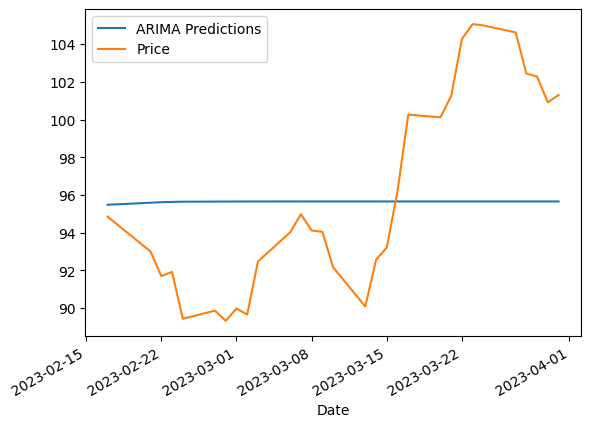

In [42]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index=series.index[start:end+1]
pred.plot(legend=True)
test['Price'].plot(legend=True)

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Price'].mean()
rmse=sqrt(mean_squared_error(pred,test['Price']))
print(rmse)

5.30745079729503


#### 6. Validate the model

Here the error value is ~5.30. Therefore, the ARIMA model is also valid model for 
predicting the future data of this dataset.

#### 7. Using the model forecast future values

NameError: name 'forecast' is not defined

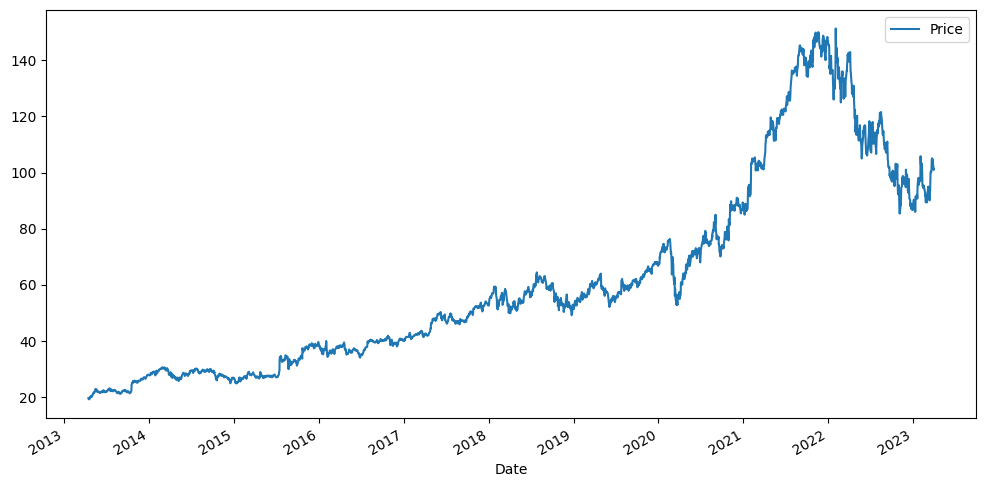

In [64]:
ax=series['Price'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlable='year',ylabel